In [0]:
! pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [2]:
import prince
import pandas as pd

### Import the HR data set (hr_dataset.csv). 

In [5]:
data = pd.read_csv('..\..\Some Data\hr_dataset.csv')
# This is how I get data from my local environmen without clogging up my github. If you need to access the same in another way to run this, it can be found as a Google Sheets document at this link https://drive.google.com/file/d/1DdwoOD_JfheYWG4xVFvYjEiqj2usZ52P

In [7]:
hr_df = data.copy()
hr_df

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,48,52.25,MA,2056,Male,Single,US Citizen,No,Asian,289,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,36,51.00,MA,1887,Male,Single,US Citizen,No,Asian,284,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,34,46.00,MA,2045,Male,Single,US Citizen,No,White,284,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,30,45.00,MA,2134,Male,Married,US Citizen,No,White,220,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [14]:
# Print numeric column names
print('Numeric columns:', list(hr_df.select_dtypes('number').columns))

# Print categorical columns names
print('Categorical columns:', list(hr_df.select_dtypes('object').columns))

# Turn zip code into a categorical data type
hr_df['Zip'] = hr_df['Zip'].astype('object')

Numeric columns: ['Age', 'Pay Rate', 'Zip', 'Days Employed']
Categorical columns: ['State', 'Sex', 'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino', 'RaceDesc', 'Reason For Term', 'Employment Status', 'Department', 'Position', 'Manager Name', 'Employee Source', 'Performance Score']


### Pull out the categorical variables and note the dimensions of the data set.

In [19]:
print('dimensions:', hr_df.shape)
cat_data = hr_df.select_dtypes('object')
cat_data

dimensions: (310, 17)


,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,MA,1450,Female,Married,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,MA,1460,Male,Divorced,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,MA,2703,Male,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,MA,2170,Female,Married,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,MA,2330,Female,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,MA,2056,Male,Single,US Citizen,No,Asian,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,MA,1887,Male,Single,US Citizen,No,Asian,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,MA,2045,Male,Single,US Citizen,No,White,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,MA,2134,Male,Married,US Citizen,No,White,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


### Reduce these categorical features down to two dimensions using MCA.

In [20]:
model = prince.MCA()
mca = model.fit(cat_data)
coordinates = mca.transform(cat_data)
coordinates

,0,1
0,0.079334,0.160054
1,0.306226,0.181563
2,0.124866,0.277358
3,0.032191,0.075913
4,0.266021,0.068326
...,...,...
305,-0.009120,1.947135
306,-0.040194,1.603874
307,-0.009289,1.538399
308,-0.030574,1.727188


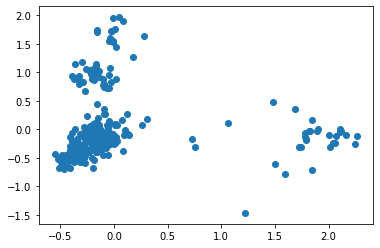

In [35]:
import matplotlib.pyplot as plt
plt.scatter(coordinates[0], coordinates[1])

### Plot the coordinates of each resulting dimension.

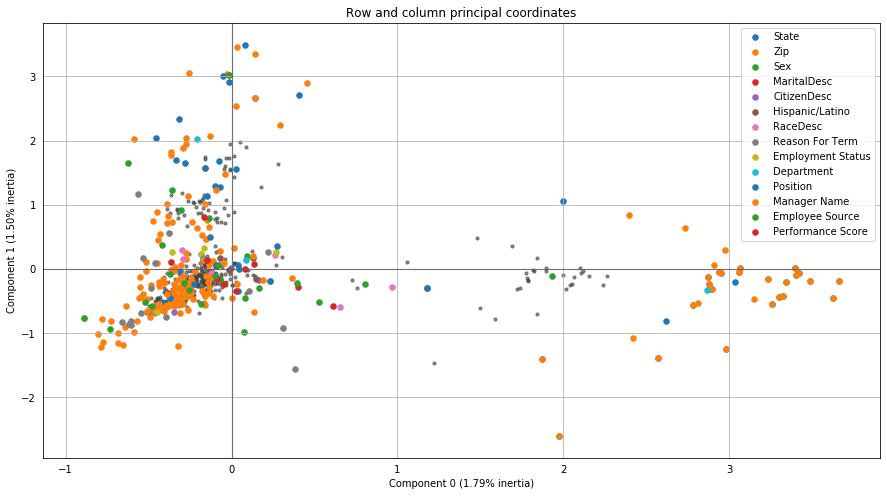

In [36]:
mca.plot_coordinates(
    X=cat_data,
    ax=None,
    figsize=(15, 8),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    show_column_labels=False,
    column_points_size=30,
    legend_n_cols=1
)

### One hot encode the categorical features and note the change in dimensions in the data set.

In [31]:
one_hot_df = pd.get_dummies(cat_data)
print('dimensions:', one_hot_df.shape)
one_hot_df.head()

dimensions: (310, 313)


,State_AL,State_AZ,State_CA,State_CO,State_CT,State_FL,State_GA,State_ID,State_IN,State_KY,...,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth,Performance Score_90-day meets,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_N/A- too early to review,Performance Score_Needs Improvement,Performance Score_PIP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Reduce the one hot encoded categorical features down to two dimensions using MCA.

In [37]:
mca = model.fit(one_hot_df)
one_hot_coordinates = mca.transform(one_hot_df)
one_hot_coordinates.head()

,0,1
0,0.064971,0.106917
1,0.109711,0.099410
2,0.081479,0.131529
3,0.035562,0.083014
4,0.076082,0.061101


### Plot the coordinates of each resulting dimension.

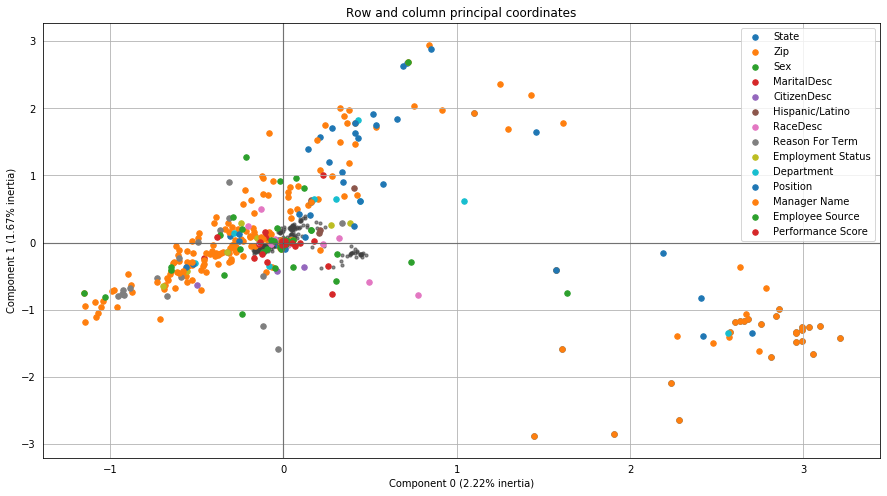

In [39]:
mca.plot_coordinates(one_hot_df, figsize=(15, 8))

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [44]:
model = prince.FAMD()
famd = model.fit(hr_df)
coordinates = famd.row_coordinates(hr_df)
coordinates.head()

,0,1
0,68.724313,19.692501
1,62.980759,31.056738
2,72.237136,31.813063
3,68.509555,13.681560
4,68.679559,20.303591


### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

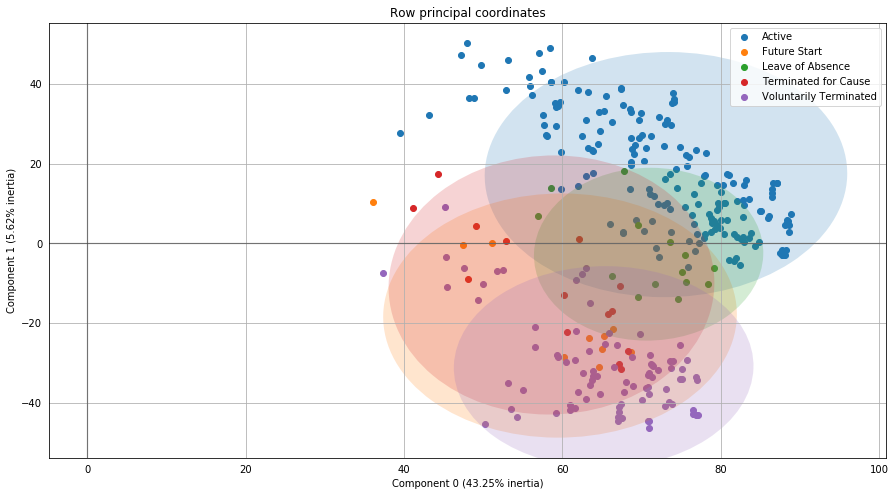

In [45]:
famd.plot_row_coordinates(
    X=hr_df,
    figsize=(15,8),
    color_labels=hr_df['Employment Status']
)